<a href="https://colab.research.google.com/github/fatemehabedin2/AIG/blob/main/NLP_GPT_fine_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.	Data Collection:
  
Source: Project Gutenberg, https://www.gutenberg.org

Collect a large corpus of text from classic literature.


In [ ]:
import requests

books = {
    "Emma": "https://www.gutenberg.org/files/158/158-0.txt",
    "Persuasion": "https://www.gutenberg.org/files/105/105-0.txt",
}

for title, url in books.items():
    response = requests.get(url)
    book_text = response.text

    with open(f"{title}_raw.txt", "w", encoding="utf-8") as f:
        f.write(book_text)

    print(f"{title} downloaded with {len(book_text)} characters.")

    print("First 2000 characters: ", book_text[:2000])
    print("*" * 10)
    print("Last 2000 characters: ", book_text[-2000:])
    print("-" * 50)

Emma downloaded with 897023 characters.
First 2000 characters:  *** START OF THE PROJECT GUTENBERG EBOOK 158 ***




Emma

by Jane Austen


Contents

 VOLUME I.
 CHAPTER I.
 CHAPTER II.
 CHAPTER III.
 CHAPTER IV.
 CHAPTER V.
 CHAPTER VI.
 CHAPTER VII.
 CHAPTER VIII.
 CHAPTER IX.
 CHAPTER X.
 CHAPTER XI.
 CHAPTER XII.
 CHAPTER XIII.
 CHAPTER XIV.
 CHAPTER XV.
 CHAPTER XVI.
 CHAPTER XVII.
 CHAPTER XVIII.

 VOLUME II.
 CHAPTER I.
 CHAPTER II.
 CHAPTER III.
 CHAPTER IV.
 CHAPTER V.
 CHAPTER VI.
 CHAPTER VII.
 CHAPTER VIII.
 CHAPTER IX.
 CHAPTER X.
 CHAPTER XI.
 CHAPTER XII.
 CHAPTER XIII.
 CHAPTER XIV.
 CHAPTER XV.
 CHAPTER XVI.
 CHAPTER XVII.
 CHAPTER XVIII.

 VOLUME III.
 CHAPTER I.
 CHAPTER II.
 CHAPTER III.
 CHAPTER IV.
 CHAPTER V.
 CHAPTER VI.
 CHAPTER VII.
 CHAPTER VIII.
 CHAPTER IX.
 CHAPTER X.
 CHAPTER XI.
 CHAPTER XII.
 CHAPTER XIII.
 CHAPTER XIV.
 CHAPTER XV.
 CHAPTER XVI.
 CHAPTER XVII.
 CHAPTER XVIII.
 CHAPTER XIX.




VOLUME I




CHAPTER I


Emma Woodhouse, handsome, clever, 

# 2.	Pre-processing:

Clean and tokenize the text data.

Prepare the data for training a language model.


In [ ]:
# Remove Gutenberg header/footer

def extract_book_body(text):
    import re
    pattern = r"\*\*\* START OF.*?\*\*\*(.*?)\*\*\* END OF.*?\*\*\*"
    match = re.search(pattern, text, re.DOTALL)
    if match:
        return match.group(1).strip()
    else:
        print("START/END markers not found.")
        return text.strip()


# Remove TOC, CHAPTER/VOLUME clutter with whitespace cleanup

def clean_content_markers(text):
    import re

    # Remove CONTENTS to first CHAPTER I
    content_start = re.search(r"CONTENTS", text, flags=re.IGNORECASE)
    first_chapter = re.search(r"\bCHAPTER\s+I\b", text, flags=re.IGNORECASE)

    if content_start and first_chapter and content_start.start() < first_chapter.start():
        text = text[:content_start.start()] + text[first_chapter.start():]

    # Remove TOC-style standalone lines like "CHAPTER IX", "VOLUME II"
    text = re.sub(r"^\s*(CHAPTER|VOLUME)\s+[IVXLC]+\.\s*$", "", text, flags=re.MULTILINE | re.IGNORECASE)
    text = re.sub(r"^\s*(CHAPTER|VOLUME)\s+[IVXLC]+\s*$", "", text, flags=re.MULTILINE | re.IGNORECASE)

    # Clean extra whitespace lines and strip spaces
    lines = text.splitlines()
    cleaned_lines = [line.strip() for line in lines if line.strip() != ""]  # Each line has leading and trailing whitespace removed. Blank lines (after stripping) are excluded.
    text = "\n".join(cleaned_lines)

    return text.strip()

In [ ]:
book_names = ["Emma", "Persuasion"]

for name in book_names:
    print(f"\nProcessing {name.title()}...")

    with open(f"{name}_raw.txt", "r", encoding="utf-8") as f:
        raw_text = f.read()

    trimmed = extract_book_body(raw_text)

    cleaned = clean_content_markers(trimmed)

    with open(f"{name}_clean.txt", "w", encoding="utf-8") as f:
        f.write(cleaned)

    print(f"{name}_clean.txt saved. Length: {len(cleaned)} characters")
    print("Preview:")
    print(cleaned[:300])
    print("*" * 30)
    print(cleaned[-300: ])
    print("-" * 50)


Processing Emma...
Emma_clean.txt saved. Length: 876270 characters
Preview:
Emma
by Jane Austen
Emma Woodhouse, handsome, clever, and rich, with a comfortable home and
happy disposition, seemed to unite some of the best blessings of
existence; and had lived nearly twenty-one years in the world with very
little to distress or vex her.
She was the youngest of the two daughter
******************************
ew lace veils; a
most pitiful business!—Selina would stare when she heard of it.”—But,
in spite of these deficiencies, the wishes, the hopes, the confidence,
the predictions of the small band of true friends who witnessed the
ceremony, were fully answered in the perfect happiness of the union.
FINIS
--------------------------------------------------

Processing Persuasion...
Persuasion_clean.txt saved. Length: 463030 characters
Preview:
Persuasion
by Jane Austen
(1818)
Sir Walter Elliot, of Kellynch Hall, in Somersetshire, was a man who,
for his own amusement, never took up any book b

In [ ]:
# Save the final combined corpus

book_names = ["Emma", "Persuasion"]

combined_text = ""

for name in book_names:
    with open(f"{name}_clean.txt", "r", encoding="utf-8") as f:
        book_text = f.read()
        combined_text += book_text.strip() + "\n\n"  # add spacing between books


with open("combined_clean_corpus.txt", "w", encoding="utf-8") as f:
    f.write(combined_text)

print("All books combined. Total length:", len(combined_text), "characters")
print(combined_text[:300])
print("*" * 30)
print(combined_text[-300: ])


All books combined. Total length: 1339304 characters
Emma
by Jane Austen
Emma Woodhouse, handsome, clever, and rich, with a comfortable home and
happy disposition, seemed to unite some of the best blessings of
existence; and had lived nearly twenty-one years in the world with very
little to distress or vex her.
She was the youngest of the two daughter
******************************
h
that tenderness less, the dread of a future war all that could dim her
sunshine. She gloried in being a sailor’s wife, but she must pay the
tax of quick alarm for belonging to that profession which is, if
possible, more distinguished in its domestic virtues than in its
national importance.
Finis




In [ ]:
!pip install transformers datasets scikit-learn -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 5.1 MB/s eta 0:00:00a 0:00:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.8.0 requires google-cloud-bigquery-storage<3.0.0,>=2.30.0, which is not installed.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-cupti-cu12 12.5.82 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-nvrtc-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-nvrtc-cu12 12.5.82 which is incomp

Tokenize the Text Using GPT-2 Tokenizer

Before feeding text into GPT-2, we need to convert text to token IDs (what the model understands) and format the data into manageable chunks for training.
Here we are seeing subword tokens from a Byte-Pair Encoding (BPE) tokenizer and words are broken into smaller units (subwords) to efficiently handle rare or unknown words, vocabulary size limits, and word variations.

In [ ]:
from transformers import GPT2Tokenizer
from pathlib import Path

# Load the cleaned corpus
corpus_path = Path("combined_clean_corpus.txt")
with open(corpus_path, "r", encoding="utf-8") as f:
    combined_text = f.read()

# Initialize GPT-2 tokenizer. we can use AutoTokenizer if want general, reusable code or might change models later. It chooses the correct subclass (GPT2Tokenizer, BertTokenizer, etc.)
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")

# Tokenize the full text as one continuous stream
tokenized_full = tokenizer(combined_text, return_attention_mask=True, return_tensors=None)


print("Number of characters in corpus:", len(combined_text))
print("Number of tokens (input_ids):", len(tokenized_full["input_ids"]))
print("First 30 tokens:", tokenizer.convert_ids_to_tokens(tokenized_full["input_ids"][:30]))

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (342318 > 1024). Running this sequence through the model will result in indexing errors


Number of characters in corpus: 1339304
Number of tokens (input_ids): 342318
First 30 tokens: ['Em', 'ma', 'Ċ', 'by', 'ĠJane', 'ĠAust', 'en', 'Ċ', 'Em', 'ma', 'ĠWood', 'house', ',', 'Ġhandsome', ',', 'Ġclever', ',', 'Ġand', 'Ġrich', ',', 'Ġwith', 'Ġa', 'Ġcomfortable', 'Ġhome', 'Ġand', 'Ċ', 'happy', 'Ġdisposition', ',', 'Ġseemed']


Chunking the Data for GPT-2

Based on my project goals, the PyTorch-based custom Dataset version is a better match compared to hugging Face dataset.

because our goal is Model long-range dependencies in Jane Austen’s language and structure and avoid random splitting of sentences/paragraphs, which would break context.

I will Train on contiguous sequences (like sliding through the novel in chunks).

Why Hugging Face Dataset's default approach isn’t ideal for my project:
Hugging Face’s train_test_split() and map() usually operate per row (i.e., per line, per sample). This can break the flow of language if each row is a separate line or paragraph. So we'd need extra logic to concatenate all text first, Tokenize it, Chunk it myself, Then reconstruct a Dataset manually.

# Creating Dataset
I am defining a custom PyTorch Dataset class to prepare fixed-length token chunks (blocks) from a long sequence of tokenized input (input_ids) so it can be efficiently fed into a model during fine-tuning.

In [ ]:
from torch.utils.data import Dataset
import torch

block_size = 512  # Most transformer models (e.g., GPT-2) use 512 or 1024 token blocks.

class TextDataset(Dataset):                   # define a new class TextDataset that inherits from torch.utils.data.Dataset. This lets us use it with PyTorch DataLoader.
    def __init__(self, input_ids, block_size=block_size):   # block_size: the number of tokens per training chunk
        self.examples = []         # We’ll store all the fixed-size token blocks here.
        total_length = (len(input_ids) // block_size) * block_size   # Truncates the total input so it's a multiple of block_size
        for i in range(0, total_length, block_size):
            block = input_ids[i:i+block_size]
            self.examples.append(torch.tensor(block))

    def __len__(self):
        return len(self.examples)

    def __getitem__(self, idx):
        return {"input_ids": self.examples[idx], "attention_mask": torch.ones_like(self.examples[idx])}  # attention_mask": torch.ones_like() creates a tensor of 1s the same shape as the input_ids. attention_mask = 1 means “pay attention to this token”



In [ ]:
train_dataset = TextDataset(tokenized_full["input_ids"], block_size=block_size)

print(f"Total training examples: {len(train_dataset)}")
print(train_dataset[0])

Total training examples: 668
{'input_ids': tensor([10161,  2611,   198,  1525, 12091,  2517,   268,   198, 10161,  2611,
         5326,  4803,    11, 22665,    11, 14169,    11,   290,  5527,    11,
          351,   257,  6792,  1363,   290,   198, 34191, 24665,    11,  3947,
          284, 24558,   617,   286,   262,  1266, 28388,   286,   198, 41084,
           26,   290,   550,  5615,  3016,  8208,    12,   505,   812,   287,
          262,   995,   351,   845,   198, 31629,   284, 17087,   393, 41548,
          607,    13,   198,  3347,   373,   262, 18887,   286,   262,   734,
        14850,   286,   257,   749, 17696,   378,    11,   198,   521,   377,
         6783,  2988,    26,   290,   550,    11,   287, 12921,   286,   607,
         6621,   447,   247,    82,  4845,    11,   198, 47436, 37769,   286,
          465,  2156,   422,   257,   845,  1903,  2278,    13,  2332,  2802,
          550,   198,    67,   798,  1165,   890,  2084,   329,   607,   284,
          423,   517,

# Splitting data to train/val/test

In [ ]:
dataset_size = len(train_dataset)

train_size = int(0.9 * dataset_size)
val_size = int(0.05 * dataset_size)
test_size = dataset_size - train_size - val_size  # remainder

# Split using torch.utils.data.Subset
from torch.utils.data import Subset

train_subset = Subset(train_dataset, list(range(0, train_size)))  # using range(), it preserves sequence order, ideal for training an auto-regressive language model.
val_subset = Subset(train_dataset, list(range(train_size, train_size + val_size)))
test_subset = Subset(train_dataset, list(range(train_size + val_size, dataset_size)))

In [ ]:
from torch.utils.data import DataLoader

# Dataloaders with no multiprocessing
train_dataloader = DataLoader(train_subset, batch_size=4, shuffle=True, num_workers=0)
val_dataloader = DataLoader(val_subset, batch_size=4, num_workers=0)
test_dataloader = DataLoader(test_subset, batch_size=4, num_workers=0)

print(f"Train batches: {len(train_dataloader)}, Val batches: {len(val_dataloader)}, Test batches: {len(test_dataloader)}")

Train batches: 151, Val batches: 9, Test batches: 9


# 3.	Model Creation and Training:
  
Implement or fine-tune a GPT model for text generation and train the model on the collected corpus.

I am going to use GPT-2 for Fine-Tuning because GPT-2 is a causal (autoregressive) language model trained specifically to predict the next word in a sequence. Also, GPT-2 is much smaller than GPT-3, GPT-4, or even GPT-NeoX That makes it easy to fine-tune on Kaggle’s free GPUs and it is well-suited for literary text.


To track training/validation loss and perplexity, we’ll define a custom compute_metrics function and log them using TrainerCallback.


In [ ]:
!pip install evaluate


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 2.8 MB/s eta 0:00:00


In [ ]:
from transformers import GPT2LMHeadModel, Trainer, TrainingArguments, DataCollatorForLanguageModeling
import numpy as np
import evaluate
import math

# Load pre-trained GPT2 model
tokenizer.pad_token = tokenizer.eos_token # GPT-2's tokenizer doesn't include a pad_token by default But we're using a DataCollatorForLanguageModeling, which tries to pad sequences in a batch, and for that, a pad_token is needed.
model = GPT2LMHeadModel.from_pretrained("gpt2")
model.resize_token_embeddings(len(tokenizer))

# Data collator for language modeling (automatically creates labels from input_ids)
data_collator = DataCollatorForLanguageModeling(tokenizer=tokenizer, mlm=False)  # MLM = Masked Language Modeling (for BERT), not GPT

# Define evaluation metric
perplexity_metric = evaluate.load("perplexity", module_type="metric")

def compute_metrics(eval_preds):
    logits, labels = eval_preds

    # Convert to tensors
    logits = torch.tensor(logits)
    labels = torch.tensor(labels)

    # Shift logits and labels for next-token prediction
    shift_logits = logits[..., :-1, :].contiguous()
    shift_labels = labels[..., 1:].contiguous()

    # Flatten
    loss_fct = torch.nn.CrossEntropyLoss(ignore_index=-100)  # HuggingFace sets padding token labels to -100
    loss = loss_fct(shift_logits.view(-1, shift_logits.size(-1)), shift_labels.view(-1))

    # Calculate perplexity
    perplexity = math.exp(loss.item()) if loss.item() < 100 else float("inf")

    return {
        "eval_loss": loss.item(),
        "eval_perplexity": perplexity,
    }


# Set up training arguments
training_args = TrainingArguments(
    output_dir="./gpt2-finetuned-author",
    overwrite_output_dir=True,
    num_train_epochs=10,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    eval_strategy="epoch",
    save_strategy="epoch",
    logging_dir="./logs",
    logging_steps=10,
    save_total_limit=2,
    load_best_model_at_end=True,
    metric_for_best_model="eval_loss",  # what metric to track
    greater_is_better=False,            # since lower loss is better
    report_to="none",
)


2025-08-08 03:47:49.724049: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1754624869.869522      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1754624869.912091      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

In [ ]:
from transformers import TrainerCallback
import math

class PerplexityTrackerCallback(TrainerCallback):
    def __init__(self):
        self.train_losses = []
        self.eval_losses = []
        self.eval_perplexities = []

    def on_log(self, args, state, control, logs=None, **kwargs):
        if logs is None:
            return

        if "loss" in logs:
            self.train_losses.append(logs["loss"])
        if "eval_loss" in logs:
            self.eval_losses.append(logs["eval_loss"])
            if logs["eval_loss"] < 100:
                ppl = math.exp(logs["eval_loss"])
            else:
                ppl = float("inf")
            self.eval_perplexities.append(ppl)


# Instantiate the callback
ppl_callback = PerplexityTrackerCallback()

# Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_subset,
    eval_dataset=val_subset,
    data_collator=data_collator,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
    callbacks=[ppl_callback],
)

# Train the model
trainer.train()

/tmp/ipykernel_36/3958061298.py:29: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
`loss_type=None` was set in the config but it is unrecognised.Using the default loss: `ForCausalLMLoss`.


Epoch,Training Loss,Validation Loss,Perplexity
1,1.710800,3.297653,27.048873
2,1.630100,3.264822,26.175246
3,1.635100,3.230645,25.295773
4,1.603800,3.203198,24.610928
5,1.733400,3.204058,24.632102
6,1.540000,3.192214,24.342088
7,1.527800,3.187908,24.237506
8,1.500900,3.186543,24.204428
9,1.516800,3.188923,24.262124
10,1.667800,3.187579,24.229521


/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked t

TrainOutput(global_step=760, training_loss=1.6042628250624005, metrics={'train_runtime': 622.3795, 'train_samples_per_second': 9.656, 'train_steps_per_second': 1.221, 'total_flos': 1570365112320000.0, 'train_loss': 1.6042628250624005, 'epoch': 10.0})

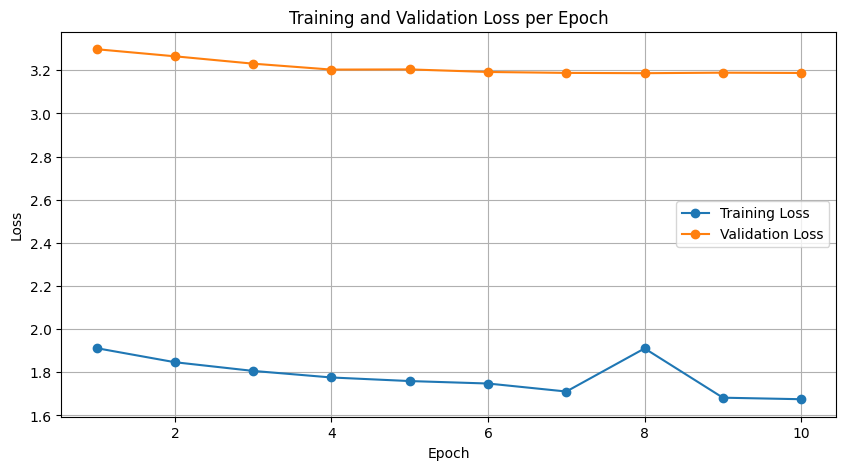

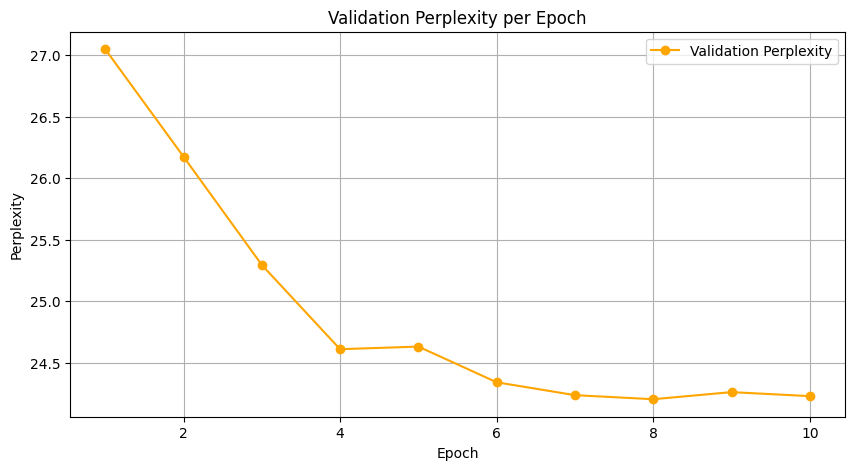

In [ ]:
import matplotlib.pyplot as plt


epochs = list(range(1, len(ppl_callback.eval_losses) + 1))

plt.figure(figsize=(10, 5))
plt.plot(epochs, ppl_callback.train_losses[:len(epochs)], label="Training Loss", marker='o')
plt.plot(epochs, ppl_callback.eval_losses, label="Validation Loss", marker='o')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss per Epoch")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(epochs, ppl_callback.eval_perplexities, label="Validation Perplexity", color="orange", marker='o')
plt.xlabel("Epoch")
plt.ylabel("Perplexity")
plt.title("Validation Perplexity per Epoch")
plt.legend()
plt.grid(True)
plt.show()


# add early stopping in Hugging Face Trainer

In [ ]:
from transformers import TrainerCallback
import math

class PerplexityTrackerCallback(TrainerCallback):
    def __init__(self):
        self.train_losses = []
        self.eval_losses = []
        self.eval_perplexities = []

    def on_log(self, args, state, control, logs=None, **kwargs):
        if logs is None:
            return

        if "loss" in logs:
            self.train_losses.append(logs["loss"])
        if "eval_loss" in logs:
            self.eval_losses.append(logs["eval_loss"])
            if logs["eval_loss"] < 100:
                ppl = math.exp(logs["eval_loss"])
            else:
                ppl = float("inf")
            self.eval_perplexities.append(ppl)

# Instantiate the callback
ppl_callback = PerplexityTrackerCallback()

In [ ]:
from transformers import EarlyStoppingCallback

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_subset,
    eval_dataset=val_subset,
    data_collator=data_collator,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
    callbacks=[
        ppl_callback,
        EarlyStoppingCallback(early_stopping_patience=3)  # added for early stopping
    ],
)

# Train the model
trainer.train()

/tmp/ipykernel_36/2016899029.py:3: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Perplexity
1,1.710800,3.297653,27.048873
2,1.630100,3.264822,26.175233
3,1.635100,3.230645,25.295773
4,1.603800,3.203198,24.610928
5,1.733400,3.204058,24.632102
6,1.540000,3.192214,24.342094
7,1.527800,3.187908,24.237506
8,1.500900,3.186543,24.204428
9,1.516800,3.188924,24.262130
10,1.667800,3.187579,24.229521


/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked t

TrainOutput(global_step=760, training_loss=1.6042628275720696, metrics={'train_runtime': 646.1743, 'train_samples_per_second': 9.301, 'train_steps_per_second': 1.176, 'total_flos': 1570365112320000.0, 'train_loss': 1.6042628275720696, 'epoch': 10.0})

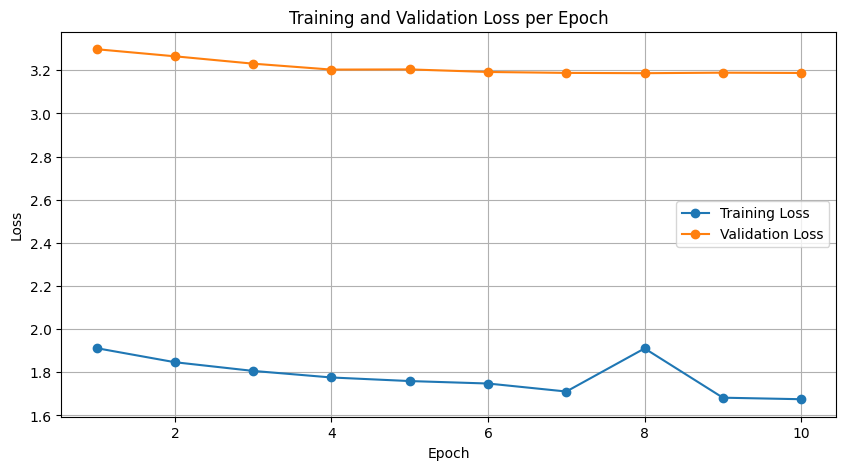

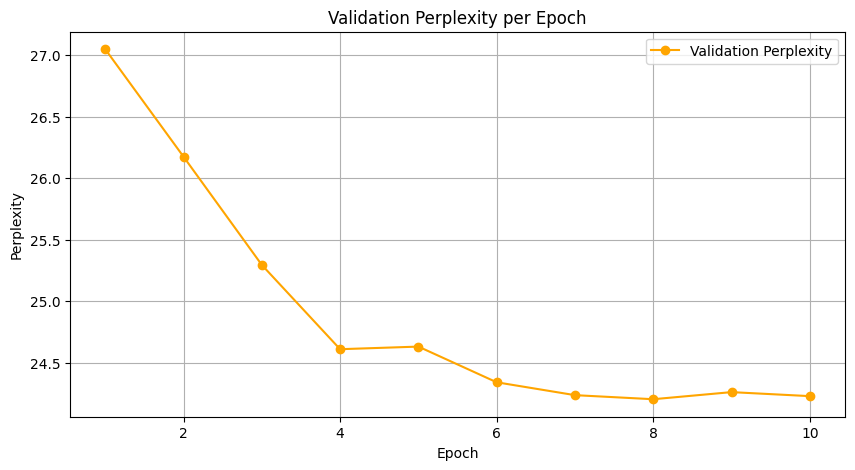

In [ ]:
import matplotlib.pyplot as plt


epochs = list(range(1, len(ppl_callback.eval_losses) + 1))

plt.figure(figsize=(10, 5))
plt.plot(epochs, ppl_callback.train_losses[:len(epochs)], label="Training Loss", marker='o')
plt.plot(epochs, ppl_callback.eval_losses, label="Validation Loss", marker='o')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss per Epoch")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(epochs, ppl_callback.eval_perplexities, label="Validation Perplexity", color="orange", marker='o')
plt.xlabel("Epoch")
plt.ylabel("Perplexity")
plt.title("Validation Perplexity per Epoch")
plt.legend()
plt.grid(True)
plt.show()

perplexity of ~24 mean?
It means that on average, our model is as "surprised" as guessing between ~24 equally likely tokens at each step.

This is reasonable for author-style fine-tuning, the model has learned meaningful patterns in ourcorpus.

If we were getting 50–100+ perplexity, that would be a red flag. But ~24 is a solid starting point for generation.

# Hyperparameter Tuning


Learning Rate:
trying 2e-5, 3e-5, 5e-5, 1e-5

Using a learning rate scheduler (cosine, constant_with_warmup)

Batch Size:
trying increasing from 4 to 8

Larger batch sizes can stabilize training and improve generalization.

Number of Epochs:
We can run more epochs with early stopping to catch subtle improvements.

In [ ]:
from transformers import GPT2LMHeadModel, Trainer, TrainingArguments, DataCollatorForLanguageModeling
import numpy as np
import evaluate
import math

# Load pre-trained GPT2 model
tokenizer.pad_token = tokenizer.eos_token # GPT-2's tokenizer doesn't include a pad_token by default But we're using a DataCollatorForLanguageModeling, which tries to pad sequences in a batch, and for that, a pad_token is needed.
model = GPT2LMHeadModel.from_pretrained("gpt2")
model.resize_token_embeddings(len(tokenizer))

# Data collator for language modeling (automatically creates labels from input_ids)
data_collator = DataCollatorForLanguageModeling(tokenizer=tokenizer, mlm=False)  # MLM = Masked Language Modeling (for BERT), not GPT

# Define evaluation metric
perplexity_metric = evaluate.load("perplexity", module_type="metric")

def compute_metrics(eval_preds):
    logits, labels = eval_preds

    # Convert to tensors
    logits = torch.tensor(logits)
    labels = torch.tensor(labels)

    # Shift logits and labels for next-token prediction
    shift_logits = logits[..., :-1, :].contiguous()
    shift_labels = labels[..., 1:].contiguous()

    # Flatten
    loss_fct = torch.nn.CrossEntropyLoss(ignore_index=-100)  # HuggingFace sets padding token labels to -100
    loss = loss_fct(shift_logits.view(-1, shift_logits.size(-1)), shift_labels.view(-1))

    # Calculate perplexity
    perplexity = math.exp(loss.item()) if loss.item() < 100 else float("inf")

    return {
        "eval_loss": loss.item(),
        "eval_perplexity": perplexity,
    }

from transformers import TrainerCallback
import math

class PerplexityTrackerCallback(TrainerCallback):
    def __init__(self):
        self.train_losses = []
        self.eval_losses = []
        self.eval_perplexities = []

    def on_log(self, args, state, control, logs=None, **kwargs):
        if logs is None:
            return

        if "loss" in logs:
            self.train_losses.append(logs["loss"])
        if "eval_loss" in logs:
            self.eval_losses.append(logs["eval_loss"])
            if logs["eval_loss"] < 100:
                ppl = math.exp(logs["eval_loss"])
            else:
                ppl = float("inf")
            self.eval_perplexities.append(ppl)


# Instantiate the callback
ppl_callback = PerplexityTrackerCallback()


2025-08-08 10:21:57.356943: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1754648517.599895      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1754648517.670767      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

In [ ]:
# Set up training arguments
training_args = TrainingArguments(
    output_dir="./gpt2-finetuned-author",
    overwrite_output_dir=True,
    num_train_epochs=50,         ##increasing
    per_device_train_batch_size=8,   ##increasing
    per_device_eval_batch_size=8,
    eval_strategy="epoch",
    save_strategy="epoch",
    logging_dir="./logs",
    logging_steps=10,
    save_total_limit=2,
    load_best_model_at_end=True,
    metric_for_best_model="eval_loss",
    greater_is_better=False,
    learning_rate=5e-5,  # changed this to 3e-5, 5e-5, and 1e-5 to test
    warmup_steps=500,    # added
    lr_scheduler_type="cosine",
    report_to="none",
)

from transformers import EarlyStoppingCallback

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_subset,
    eval_dataset=val_subset,
    data_collator=data_collator,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
    callbacks=[
        ppl_callback,
        EarlyStoppingCallback(early_stopping_patience=2)  # 2 patience
    ],
)

# Train the model
trainer.train()

/tmp/ipykernel_36/521869691.py:24: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
`loss_type=None` was set in the config but it is unrecognised.Using the default loss: `ForCausalLMLoss`.


Epoch,Training Loss,Validation Loss,Perplexity
1,1.995000,3.628903,37.671187
2,1.885400,3.498535,33.066734
3,1.811200,3.415716,30.438509
4,1.766300,3.356805,28.697133
5,1.754100,3.319076,27.634608
6,1.682300,3.281868,26.625265
7,1.666000,3.262993,26.127430
8,1.650700,3.245693,25.679321
9,1.604500,3.232844,25.351476
10,1.610300,3.228042,25.230031


/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked t

TrainOutput(global_step=760, training_loss=1.6316226871390092, metrics={'train_runtime': 1238.3845, 'train_samples_per_second': 24.265, 'train_steps_per_second': 1.534, 'total_flos': 3140730224640000.0, 'train_loss': 1.6316226871390092, 'epoch': 20.0})

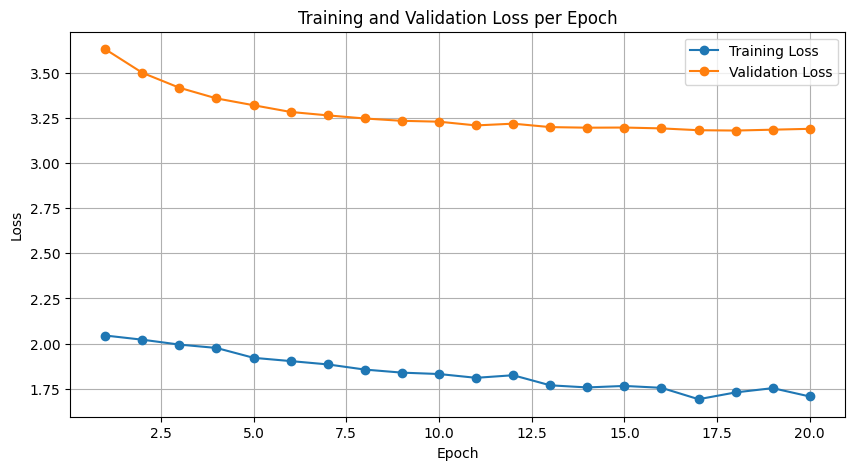

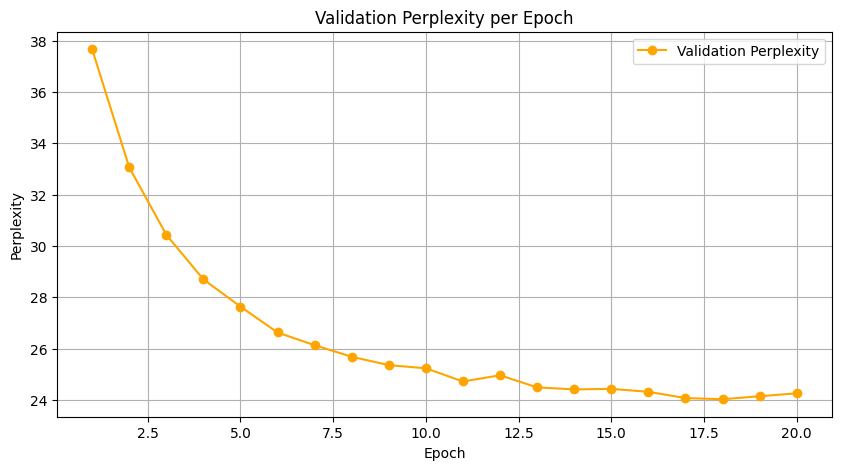

In [ ]:
import matplotlib.pyplot as plt


epochs = list(range(1, len(ppl_callback.eval_losses) + 1))

plt.figure(figsize=(10, 5))
plt.plot(epochs, ppl_callback.train_losses[:len(epochs)], label="Training Loss", marker='o')
plt.plot(epochs, ppl_callback.eval_losses, label="Validation Loss", marker='o')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss per Epoch")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(epochs, ppl_callback.eval_perplexities, label="Validation Perplexity", color="orange", marker='o')
plt.xlabel("Epoch")
plt.ylabel("Perplexity")
plt.title("Validation Perplexity per Epoch")
plt.legend()
plt.grid(True)
plt.show()

# 4.	Evaluation:
Evaluate the quality of the generated text.
Use perplexity and human evaluation for assessment.

In [ ]:
# Evaluate on the test set
test_results = trainer.evaluate(eval_dataset=test_subset)

print(f"Test Loss: {test_results['eval_loss']:.4f}")
if test_results['eval_loss'] < 100:     # safety check to prevent perplexity overflow
    test_perplexity = math.exp(test_results['eval_loss'])
    print(f"Test Perplexity: {test_perplexity:.4f}")
else:
    print("Test Perplexity: Inf (loss too high)")


/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Test Loss: 3.2927
Test Perplexity: 26.9146


In [ ]:
from transformers import pipeline, set_seed

generator = pipeline("text-generation", model=model, tokenizer=tokenizer)  # creates a text generation pipeline that handles tokenization, padding and decoding
set_seed(42)  # Ensures reproducible generations to be able to compare

# Example prompt
prompt = "It is a truth universally acknowledged"

# Generate samples
outputs = generator(
    prompt,
    max_length=100,           # total token length
    num_return_sequences=3,   # generate 3 completions
    temperature=0.8,          # controls creativity (higher = more random)
    top_k=50,                 # Limits sampling to the top 50 most probable tokens at each step
    top_p=0.95,               # nucleus samplingNucleus sampling: dynamically includes top tokens that cover 95% of the total probability
    do_sample=True            # enables stochastic generation
)

# Display generated text
for i, output in enumerate(outputs):
    print(f"\n--- Sample {i+1} ---\n{output['generated_text']}")



Device set to use cuda:0
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Both `max_new_tokens` (=256) and `max_length`(=100) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)



--- Sample 1 ---
It is a truth universally acknowledged, that no man can
be a better wife than his wife, and it is not at all unreasonable to suppose
his wife will always be with him.”
“And you see, indeed, that I must endeavour to persuade Mr. Woodhouse, that
your daughter has been in love with her father a great deal since she was twelve years old, and
that in many respects this is the only case in which she has done.”
“It is a great evil,” said Emma, “which has given way to a more
contrary view of your conduct towards your son, which I am afraid
may be very much the result of your having such a misconception of his character,
which I dare say is growing even to such a degree.”
“Ah! you, Emma, and Emma, how well you wish to be proved correct
by me,” cried Emma, “I do not know, that you think I have
nothing to say for your friend’s sake. I will not attempt to convince you
of your own being so completely mistaken as to think him so
unfit, at present, as to have any claim to any degree

# Adding some regularization technics

adding drpout and weight_decay for better generalization.

In [ ]:
from transformers import GPT2LMHeadModel, Trainer, TrainingArguments, DataCollatorForLanguageModeling
import numpy as np
import evaluate
import math

from transformers import GPT2Config, GPT2LMHeadModel

# Set pad token
tokenizer.pad_token = tokenizer.eos_token

# Load GPT-2 config with higher dropout rates for better regularization
config = GPT2Config.from_pretrained(
    "gpt2",
    attn_pdrop=0.3,   # Dropout on attention weights
    embd_pdrop=0.3,   # Dropout on embeddings
    resid_pdrop=0.3   # Dropout on residual connections
)

# Load model with updated config
model = GPT2LMHeadModel.from_pretrained("gpt2", config=config)

# Adjust token embeddings size to match tokenizer
model.resize_token_embeddings(len(tokenizer))


# Data collator for language modeling (automatically creates labels from input_ids)
data_collator = DataCollatorForLanguageModeling(tokenizer=tokenizer, mlm=False)  # MLM = Masked Language Modeling (for BERT), not GPT

# Define evaluation metric
perplexity_metric = evaluate.load("perplexity", module_type="metric")

def compute_metrics(eval_preds):
    logits, labels = eval_preds

    # Convert to tensors
    logits = torch.tensor(logits)
    labels = torch.tensor(labels)

    # Shift logits and labels for next-token prediction
    shift_logits = logits[..., :-1, :].contiguous()
    shift_labels = labels[..., 1:].contiguous()

    # Flatten
    loss_fct = torch.nn.CrossEntropyLoss(ignore_index=-100)  # HuggingFace sets padding token labels to -100
    loss = loss_fct(shift_logits.view(-1, shift_logits.size(-1)), shift_labels.view(-1))

    # Calculate perplexity
    perplexity = math.exp(loss.item()) if loss.item() < 100 else float("inf")

    return {
        "eval_loss": loss.item(),
        "eval_perplexity": perplexity,
    }


# Set up training arguments
training_args = TrainingArguments(
    output_dir="./gpt2-finetuned-author",
    overwrite_output_dir=True,
    num_train_epochs=50,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    eval_strategy="epoch",
    save_strategy="epoch",
    logging_dir="./logs",
    logging_steps=10,
    save_total_limit=2,
    load_best_model_at_end=True,
    metric_for_best_model="eval_loss",
    greater_is_better=False,
    learning_rate=5e-5,
    warmup_steps=500,
    lr_scheduler_type="cosine",
    weight_decay=0.01,  # Regularization added
    report_to="none"
)


2025-08-08 11:48:43.667759: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1754653723.852696      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1754653723.905768      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

In [ ]:
from transformers import TrainerCallback
import math

class PerplexityTrackerCallback(TrainerCallback):
    def __init__(self):
        self.train_losses = []
        self.eval_losses = []
        self.eval_perplexities = []

    def on_log(self, args, state, control, logs=None, **kwargs):
        if logs is None:
            return

        if "loss" in logs:
            self.train_losses.append(logs["loss"])
        if "eval_loss" in logs:
            self.eval_losses.append(logs["eval_loss"])
            if logs["eval_loss"] < 100:
                ppl = math.exp(logs["eval_loss"])
            else:
                ppl = float("inf")
            self.eval_perplexities.append(ppl)

# Instantiate the callback
ppl_callback = PerplexityTrackerCallback()

In [ ]:
from transformers import EarlyStoppingCallback

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_subset,
    eval_dataset=val_subset,
    data_collator=data_collator,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
    callbacks=[
        ppl_callback,
        EarlyStoppingCallback(early_stopping_patience=2)  # 2 patience
    ],
)

# Train the model
trainer.train()

/tmp/ipykernel_36/1385275919.py:3: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
`loss_type=None` was set in the config but it is unrecognised.Using the default loss: `ForCausalLMLoss`.


Epoch,Training Loss,Validation Loss,Perplexity
1,2.911200,3.686756,39.914834
2,2.533000,3.647051,38.361101
3,2.335200,3.618173,37.269152
4,2.229400,3.563998,35.303791
5,2.175900,3.509542,33.432728
6,2.079100,3.459380,31.797026
7,2.032000,3.432997,30.969104
8,2.007500,3.424512,30.707441
9,1.941600,3.400079,29.966253
10,1.929000,3.394704,29.805620


/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked t

TrainOutput(global_step=988, training_loss=1.9543622186792042, metrics={'train_runtime': 1583.2838, 'train_samples_per_second': 18.98, 'train_steps_per_second': 1.2, 'total_flos': 4082949292032000.0, 'train_loss': 1.9543622186792042, 'epoch': 26.0})

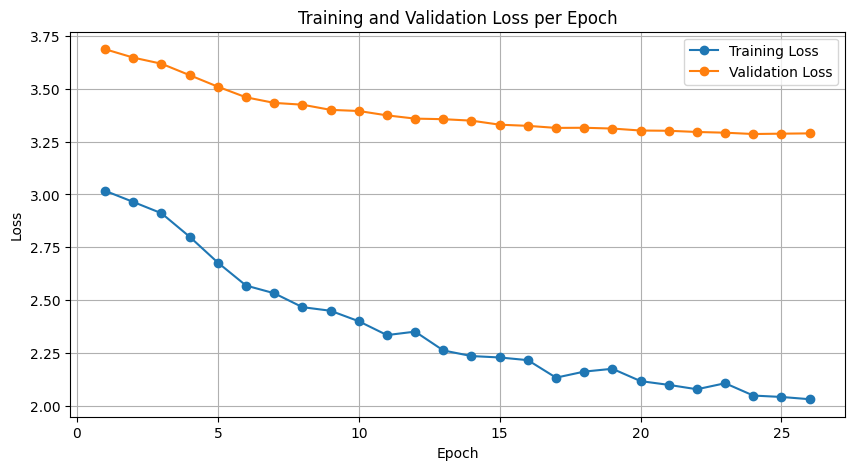

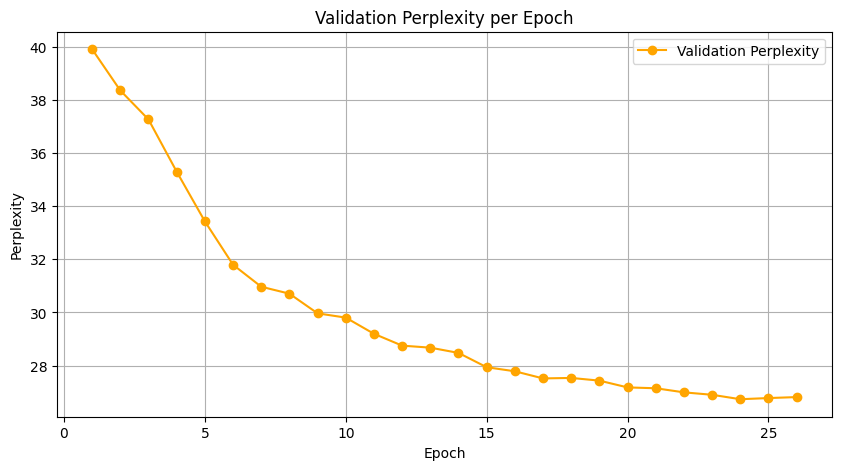

In [ ]:
import matplotlib.pyplot as plt

# Convert logs to lists
epochs = list(range(1, len(ppl_callback.eval_losses) + 1))

plt.figure(figsize=(10, 5))
plt.plot(epochs, ppl_callback.train_losses[:len(epochs)], label="Training Loss", marker='o')
plt.plot(epochs, ppl_callback.eval_losses, label="Validation Loss", marker='o')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss per Epoch")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(epochs, ppl_callback.eval_perplexities, label="Validation Perplexity", color="orange", marker='o')
plt.xlabel("Epoch")
plt.ylabel("Perplexity")
plt.title("Validation Perplexity per Epoch")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Evaluate on the test set
test_results = trainer.evaluate(eval_dataset=test_subset)

# Print the results
print(f"Test Loss: {test_results['eval_loss']:.4f}")
if test_results['eval_loss'] < 100:     # safety check to prevent perplexity overflow
    test_perplexity = math.exp(test_results['eval_loss'])
    print(f"Test Perplexity: {test_perplexity:.4f}")
else:
    print("Test Perplexity: Inf (loss too high)")


/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Test Loss: 3.3957
Test Perplexity: 29.8342


# Regularization 2: less strong set up


In [ ]:
from transformers import GPT2LMHeadModel, Trainer, TrainingArguments, DataCollatorForLanguageModeling
import numpy as np
import evaluate
import math

from transformers import GPT2Config, GPT2LMHeadModel

# Set pad token
tokenizer.pad_token = tokenizer.eos_token

# Load GPT-2 config with higher dropout rates for better regularization
config = GPT2Config.from_pretrained(
    "gpt2",
    attn_pdrop=0.1,   # Dropout on attention weights
    embd_pdrop=0.1,   # Dropout on embeddings
    resid_pdrop=0.1   # Dropout on residual connections
)

# Load model with updated config
model = GPT2LMHeadModel.from_pretrained("gpt2", config=config)

# Adjust token embeddings size to match tokenizer
model.resize_token_embeddings(len(tokenizer))


# Data collator for language modeling (automatically creates labels from input_ids)
data_collator = DataCollatorForLanguageModeling(tokenizer=tokenizer, mlm=False)  # MLM = Masked Language Modeling (for BERT), not GPT

# Define evaluation metric
perplexity_metric = evaluate.load("perplexity", module_type="metric")

def compute_metrics(eval_preds):
    logits, labels = eval_preds

    # Convert to tensors
    logits = torch.tensor(logits)
    labels = torch.tensor(labels)

    # Shift logits and labels for next-token prediction
    shift_logits = logits[..., :-1, :].contiguous()
    shift_labels = labels[..., 1:].contiguous()

    # Flatten
    loss_fct = torch.nn.CrossEntropyLoss(ignore_index=-100)  # HuggingFace sets padding token labels to -100
    loss = loss_fct(shift_logits.view(-1, shift_logits.size(-1)), shift_labels.view(-1))

    # Calculate perplexity
    perplexity = math.exp(loss.item()) if loss.item() < 100 else float("inf")

    return {
        "eval_loss": loss.item(),
        "eval_perplexity": perplexity,
    }


# Set up training arguments
training_args = TrainingArguments(
    output_dir="./gpt2-finetuned-author",
    overwrite_output_dir=True,
    num_train_epochs=50,
    per_device_train_batch_size=4,  # smaller batch
    per_device_eval_batch_size=4,
    eval_strategy="epoch",
    save_strategy="epoch",
    logging_dir="./logs",
    logging_steps=10,
    save_total_limit=2,
    load_best_model_at_end=True,
    metric_for_best_model="eval_loss",
    greater_is_better=False,
    learning_rate=3e-5,   # down from 5e-5
    warmup_steps=300,       # down from 500
    lr_scheduler_type="cosine",
    weight_decay=0.01,  # mild
    max_grad_norm=1.0,                       # safe clipping
    report_to="none"
)


2025-08-08 14:08:20.239064: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1754662100.422689      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1754662100.476384      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

In [ ]:
from transformers import TrainerCallback
import math

class PerplexityTrackerCallback(TrainerCallback):
    def __init__(self):
        self.train_losses = []
        self.eval_losses = []
        self.eval_perplexities = []

    def on_log(self, args, state, control, logs=None, **kwargs):
        if logs is None:
            return

        if "loss" in logs:
            self.train_losses.append(logs["loss"])
        if "eval_loss" in logs:
            self.eval_losses.append(logs["eval_loss"])
            if logs["eval_loss"] < 100:
                ppl = math.exp(logs["eval_loss"])
            else:
                ppl = float("inf")
            self.eval_perplexities.append(ppl)

# Instantiate the callback
ppl_callback = PerplexityTrackerCallback()

In [ ]:
from transformers import EarlyStoppingCallback

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_subset,
    eval_dataset=val_subset,
    data_collator=data_collator,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
    callbacks=[
        ppl_callback,
        EarlyStoppingCallback(early_stopping_patience=2)  # 2 patience
    ],
)

# Train the model
trainer.train()

/tmp/ipykernel_36/1385275919.py:3: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
`loss_type=None` was set in the config but it is unrecognised.Using the default loss: `ForCausalLMLoss`.


Epoch,Training Loss,Validation Loss,Perplexity
1,1.879800,3.516478,33.665378
2,1.762400,3.384345,29.498434
3,1.740300,3.313562,27.482653
4,1.695300,3.269401,26.295385
5,1.830600,3.245350,25.670513
6,1.621900,3.223733,25.121556
7,1.598300,3.211787,24.823234
8,1.551300,3.210228,24.784576
9,1.565300,3.205599,24.670104
10,1.709200,3.194941,24.408566


/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked t

TrainOutput(global_step=1140, training_loss=1.636724339033428, metrics={'train_runtime': 973.5368, 'train_samples_per_second': 30.867, 'train_steps_per_second': 3.903, 'total_flos': 2355547668480000.0, 'train_loss': 1.636724339033428, 'epoch': 15.0})

In [ ]:
from transformers import EarlyStoppingCallback

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_subset,
    eval_dataset=val_subset,
    data_collator=data_collator,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
    callbacks=[
        ppl_callback,
        EarlyStoppingCallback(early_stopping_patience=2)  # 2 patience
    ],
)

# Train the model
trainer.train()

/tmp/ipykernel_36/1385275919.py:3: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
`loss_type=None` was set in the config but it is unrecognised.Using the default loss: `ForCausalLMLoss`.


Epoch,Training Loss,Validation Loss,Perplexity
1,1.879800,3.516479,33.665386
2,1.762400,3.384344,29.498420
3,1.740300,3.313562,27.482653
4,1.695300,3.269401,26.295379
5,1.830600,3.245350,25.670513
6,1.621900,3.223733,25.121556
7,1.598300,3.211787,24.823240
8,1.551300,3.210229,24.784582
9,1.565300,3.205599,24.670098
10,1.709200,3.194941,24.408572


/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked t

TrainOutput(global_step=1140, training_loss=1.636724304734615, metrics={'train_runtime': 944.1126, 'train_samples_per_second': 31.829, 'train_steps_per_second': 4.025, 'total_flos': 2355547668480000.0, 'train_loss': 1.636724304734615, 'epoch': 15.0})

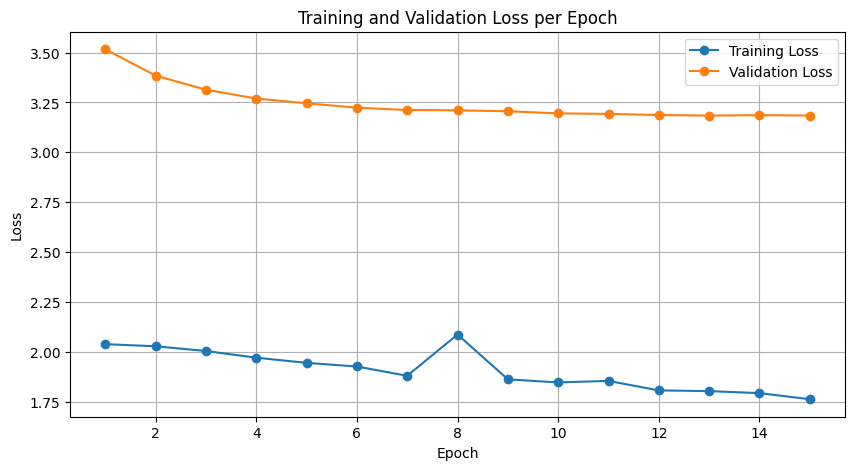

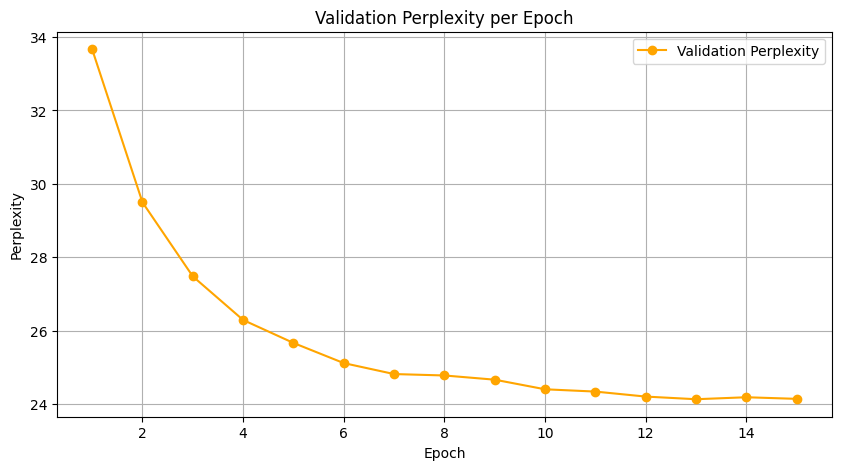

In [ ]:
import matplotlib.pyplot as plt

# Convert logs to lists
epochs = list(range(1, len(ppl_callback.eval_losses) + 1))

plt.figure(figsize=(10, 5))
plt.plot(epochs, ppl_callback.train_losses[:len(epochs)], label="Training Loss", marker='o')
plt.plot(epochs, ppl_callback.eval_losses, label="Validation Loss", marker='o')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss per Epoch")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(epochs, ppl_callback.eval_perplexities, label="Validation Perplexity", color="orange", marker='o')
plt.xlabel("Epoch")
plt.ylabel("Perplexity")
plt.title("Validation Perplexity per Epoch")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Evaluate on the test set
test_results = trainer.evaluate(eval_dataset=test_subset)

# Print the results
print(f"Test Loss: {test_results['eval_loss']:.4f}")
if test_results['eval_loss'] < 100:     # safety check to prevent perplexity overflow
    test_perplexity = math.exp(test_results['eval_loss'])
    print(f"Test Perplexity: {test_perplexity:.4f}")
else:
    print("Test Perplexity: Inf (loss too high)")

/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Test Loss: 3.2964
Test Perplexity: 27.0157


In [ ]:
# Evaluate on the test set
test_results = trainer.evaluate(eval_dataset=test_subset)

# Print the results
print(f"Test Loss: {test_results['eval_loss']:.4f}")
if test_results['eval_loss'] < 100:     # safety check to prevent perplexity overflow
    test_perplexity = math.exp(test_results['eval_loss'])
    print(f"Test Perplexity: {test_perplexity:.4f}")
else:
    print("Test Perplexity: Inf (loss too high)")

/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Test Loss: 3.2964
Test Perplexity: 27.0157


# Text generation and human assessment
 Trying different creativity (randomness) level by changing temperature

In [ ]:
# temperature=0.5
from transformers import pipeline, set_seed

generator = pipeline("text-generation", model=model, tokenizer=tokenizer)  # creates a text generation pipeline that handles tokenization, padding and decoding
set_seed(42)  # Ensures reproducible generations to be able to compare

# Example prompt
prompt = "It is a truth universally acknowledged"

# Generate samples
outputs = generator(
    prompt,
    max_length=100,           # total token length
    num_return_sequences=3,   # generate 3 completions
    temperature=0.5,          # controls creativity (higher = more random)
    top_k=50,                 # Limits sampling to the top 50 most probable tokens at each step
    top_p=0.95,               # Nucleus sampling: dynamically includes top tokens that cover 95% of the total probability
    do_sample=True            # enables stochastic generation
)


for i, output in enumerate(outputs):
    print(f"\n--- Sample {i+1} ---\n{output['generated_text']}")


Device set to use cuda:0
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Both `max_new_tokens` (=256) and `max_length`(=100) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)



--- Sample 1 ---
It is a truth universally acknowledged, that
every body who has any thing to say on the subject, is a friend of
the Church.”
“I have been very much obliged to you,” said Emma, “for I have been
very much obliged to you for my friend, and I thank you for your
affection.”
“I am very much obliged to you,” replied Mr. Knightley, “for I have been
very much obliged to you for my friend, and I thank you for your
affection.”
“I have been very much obliged to you,” said Mr. Knightley, “for I have been
very much obliged to you for your kindness and your good sense.”
“I have been very much obliged to you,” said Emma, “for I have been very
pleased with your kindness and your good sense. I have been very much
pleased with your good sense, and I thank you for your good
sense.”
“I have been very much obliged to you,” said Mr. Knightley, “for I have been very much
pleased with your good sense, and

--- Sample 2 ---
It is a truth universally acknowledged that the Church of England is n

In [ ]:
# temperature=0.5
from transformers import pipeline, set_seed

generator = pipeline("text-generation", model=model, tokenizer=tokenizer)  # creates a text generation pipeline that handles tokenization, padding and decoding
set_seed(42)  # Ensures reproducible generations to be able to compare

# Example prompt
prompt = "after a long hot day"

# Generate samples
outputs = generator(
    prompt,
    max_length=100,           # total token length
    num_return_sequences=3,   # generate 3 completions
    temperature=0.5,          # controls creativity (higher = more random)
    top_k=50,                 # Limits sampling to the top 50 most probable tokens at each step
    top_p=0.95,               # Nucleus sampling: dynamically includes top tokens that cover 95% of the total probability
    do_sample=True            # enables stochastic generation
)

for i, output in enumerate(outputs):
    print(f"\n--- Sample {i+1} ---\n{output['generated_text']}")

Device set to use cuda:0
Both `max_new_tokens` (=256) and `max_length`(=100) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)



--- Sample 1 ---
after a long hot day, the
slightest glow of the sun and the most delightful glow of the
farther morning, she was at the inn. “She is not tired,” said she, “and I
will be here to-morrow,” and “I will be here to-morrow; and I shall be
the first to be allowed to be in the room.”
“No,” said Emma, “I am not going to be allowed to be in the room. I have
a great deal to do, and I am very much obliged to you.”
“Oh!” cried she, “you are very obliging. You do not know I am
only going to be allowed to be in the room.”
“No,” said Mr. Knightley, “I am going to be allowed to be in the room. I have
a great deal to do, and I am very much obliged to you.”
“Oh! no,” cried Emma, “I am going to be allowed to be in the room. I have
a great deal to do, and I am very much obliged to

--- Sample 2 ---
after a long hot day, and the
others were gone off to the house, and Mrs. Weston, who
had been so much obliged to the housekeeper, was to be
called up by Mrs. Goddard. She had been very much ob

In [ ]:
# temperature=0.9
from transformers import pipeline, set_seed

generator = pipeline("text-generation", model=model, tokenizer=tokenizer)  # creates a text generation pipeline that handles tokenization, padding and decoding
set_seed(42)  # Ensures reproducible generations to be able to compare

# Example prompt
prompt = "after a long hot day"

# Generate samples
outputs = generator(
    prompt,
    max_length=100,           # total token length
    num_return_sequences=3,   # generate 3 completions
    temperature=0.9,          # controls creativity (higher = more random)
    top_k=50,                 # Limits sampling to the top 50 most probable tokens at each step
    top_p=0.95,               # Nucleus sampling: dynamically includes top tokens that cover 95% of the total probability
    do_sample=True            # enables stochastic generation
)

for i, output in enumerate(outputs):
    print(f"\n--- Sample {i+1} ---\n{output['generated_text']}")

Device set to use cuda:0
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Both `max_new_tokens` (=256) and `max_length`(=100) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)



--- Sample 1 ---
after a long hot day, you
are very glad to hear me.”
“But she could not have gone to bed on the same day, Harriet, for Harriet could not
have
been in the least alarmed. I hope Mr. Woodhouse can do some thing about it. If he
he is really so angry as to say his mother will not marry her,
Harriet could not have any thing to do.”
“I am afraid my mother cannot consent to marrying. Emma will be a
great inconvenience, for she is rather tired. She must
not go home till supper is over; and I should be glad to
have her coming back to visit me on Tuesday.”
“But you may be sure she will be very much indisposed, for
she is ill on her way to London, and Miss Bates will be very
much obliged to get her away from Hartfield.”
Emma could only listen; and in a moment she was sure it was to be
a pleasure to them both, that they should be able to meet at Hartfield.
And then they were out of the room, the door opened, and Harriet
followed them to the front door; and the rest of the

--- Sam

In [ ]:
from transformers import pipeline, set_seed

generator = pipeline("text-generation", model=model, tokenizer=tokenizer)  # creates a text generation pipeline that handles tokenization, padding and decoding
set_seed(42)  # Ensures reproducible generations to be able to compare

# Example prompt
prompt = "after a long hot day"

# Generate samples
outputs = generator(
    prompt,
    max_length=100,           # total token length
    num_return_sequences=3,   # generate 3 completions
    temperature=0.8,          # controls creativity (higher = more random)
    top_k=50,                 # Limits sampling to the top 50 most probable tokens at each step
    top_p=0.95,               # Nucleus sampling: dynamically includes top tokens that cover 95% of the total probability
    do_sample=True            # enables stochastic generation
)

for i, output in enumerate(outputs):
    print(f"\n--- Sample {i+1} ---\n{output['generated_text']}")

Device set to use cuda:0
Both `max_new_tokens` (=256) and `max_length`(=100) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)



--- Sample 1 ---
after a long hot day, you
are very much better off than you have been in your father’s house.”
“Yes, indeed. My father is always so kind, and I have always been so
kind as to call on him every morning, and tell him how to do his laundry,
and when he comes home, make the tea or dinner, and then turn around and walk over to
my mother and tell her how to do my laundry, and when he comes back again, and she
cannot do me any thing but say, “You are a little afraid of him.”
“No,” said Emma. “I am not afraid of him. I am not afraid of the little
horses. I have never been afraid of horses, and never have I ever been afraid of
the little horses.”
“Oh! no,” cried he—“they are not very bad horses, I assure you,”
“for they are very short, but they are always a very good deal smaller than
their sisters. They are very good-sized, and they are quite the
straw-horses.”
“Oh! no

--- Sample 2 ---
after a long hot day.
Anne’s spirits are not now in a good order, and Mr. Knightley,
who s

# Compare GPT-2 (baseline) vs. Fine-Tuned Model

In [ ]:
import os

os.listdir("./gpt2-finetuned-author")


['checkpoint-760', 'checkpoint-684']

In [ ]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer, pipeline, set_seed

# Load the tokenizer once
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
tokenizer.pad_token = tokenizer.eos_token

# Load baseline GPT-2 (pretrained only)
baseline_model = GPT2LMHeadModel.from_pretrained("gpt2")

# Load your fine-tuned model (path to output_dir from training)
finetuned_model = GPT2LMHeadModel.from_pretrained("./gpt2-finetuned-author/checkpoint-760")
finetuned_model.resize_token_embeddings(len(tokenizer))

# Create generation pipelines
baseline_generator = pipeline("text-generation", model=baseline_model, tokenizer=tokenizer)
finetuned_generator = pipeline("text-generation", model=finetuned_model, tokenizer=tokenizer)

prompt = "It is a truth universally acknowledged"
set_seed(42)  # ensure both models get same sampling randomness

# Generate outputs from both models
baseline_output = baseline_generator(
    prompt,
    max_length=100,
    num_return_sequences=1,
    do_sample=True,
    temperature=0.8,
    top_k=50,
    top_p=0.95
)[0]['generated_text']

finetuned_output = finetuned_generator(
    prompt,
    max_length=100,
    num_return_sequences=1,
    do_sample=True,
    temperature=0.8,
    top_k=50,
    top_p=0.95
)[0]['generated_text']


print("\n Baseline GPT-2 Output:\n")
print(baseline_output)

print("\n Fine-Tuned GPT-2 Output:\n")
print(finetuned_output)


Device set to use cuda:0
Device set to use cuda:0
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Both `max_new_tokens` (=256) and `max_length`(=100) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=256) and `max_length`(=100) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)



 Baseline GPT-2 Output:

It is a truth universally acknowledged, the only true way to achieve any goal is to do some good."

The second principle of the philosophy of the Trinity is that God must be the master, and must be capable of doing everything, even if he must do nothing. There is no natural law that states that God cannot be the best teacher. God has had his own life, and he has done nothing. He cannot have any other way of knowing and doing things.

The third principle of the Trinity is that all things are created in God, and that all things are created in God from God. All things are created in God from His will. God is the very essence of all things. Nothing is created in God. Everything is created in God from His will. Nothing is created in God.

The fourth principle of the Trinity is that all things are created in God from God. God is the very essence of all things. Everything is created in God from His will. Everything is created in God from His will.

The fifth principl